# Automaty komórkowe

## Zadanie 1 Deterministyczny automat komórkowy

In [93]:
#import cellpylib as cpl
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import shuffle

Mapping reguły 184(10)

In [75]:
mapping184 = {
    (1,1,1): 1,
    (1,1,0): 0,
    (1,0,1): 1,
    (1,0,0): 1,
    (0,1,1): 1,
    (0,1,0): 0,
    (0,0,1): 0,
    (0,0,0): 0
}


In [84]:
def generate_grid(starting_size=100, steps=100, probability_black=0.6) -> np.array:
    # czarny kolor jako 1, periodyczne warunki brzegowe: pierwszy i ostatni element wiersza "sąsiadują" ze sobą

    # TODO: przerobić losowanie : stworzyć array(1,starting_size), \
    # gdzie losujemy POŁOZENIE czarnych pól, a nie wartość kazdej z komorek po kolei

    grid = np.zeros(shape=(steps,starting_size))
    m, n = grid.shape

    for col in range(n):
        grid[0][col] = np.random.choice([0, 1],p=[1-probability_black, probability_black])
    
    for row in range(1, m):
        for col in range(0, n):
            grid[row][col] = mapping184.get((
                grid[row-1][col-1],
                grid[row-1][col],
                grid[row-1][(col+1) % n])
            )
    return grid

In [96]:
first_grid = generate_grid(starting_size=100, probability_black=0.4)
second_grid = generate_grid(probability_black=0.5)
third_grid = generate_grid(probability_black=0.6)

Pierwszy automat, prawdopodobieństwo dla czarnych pól równe 0.4.

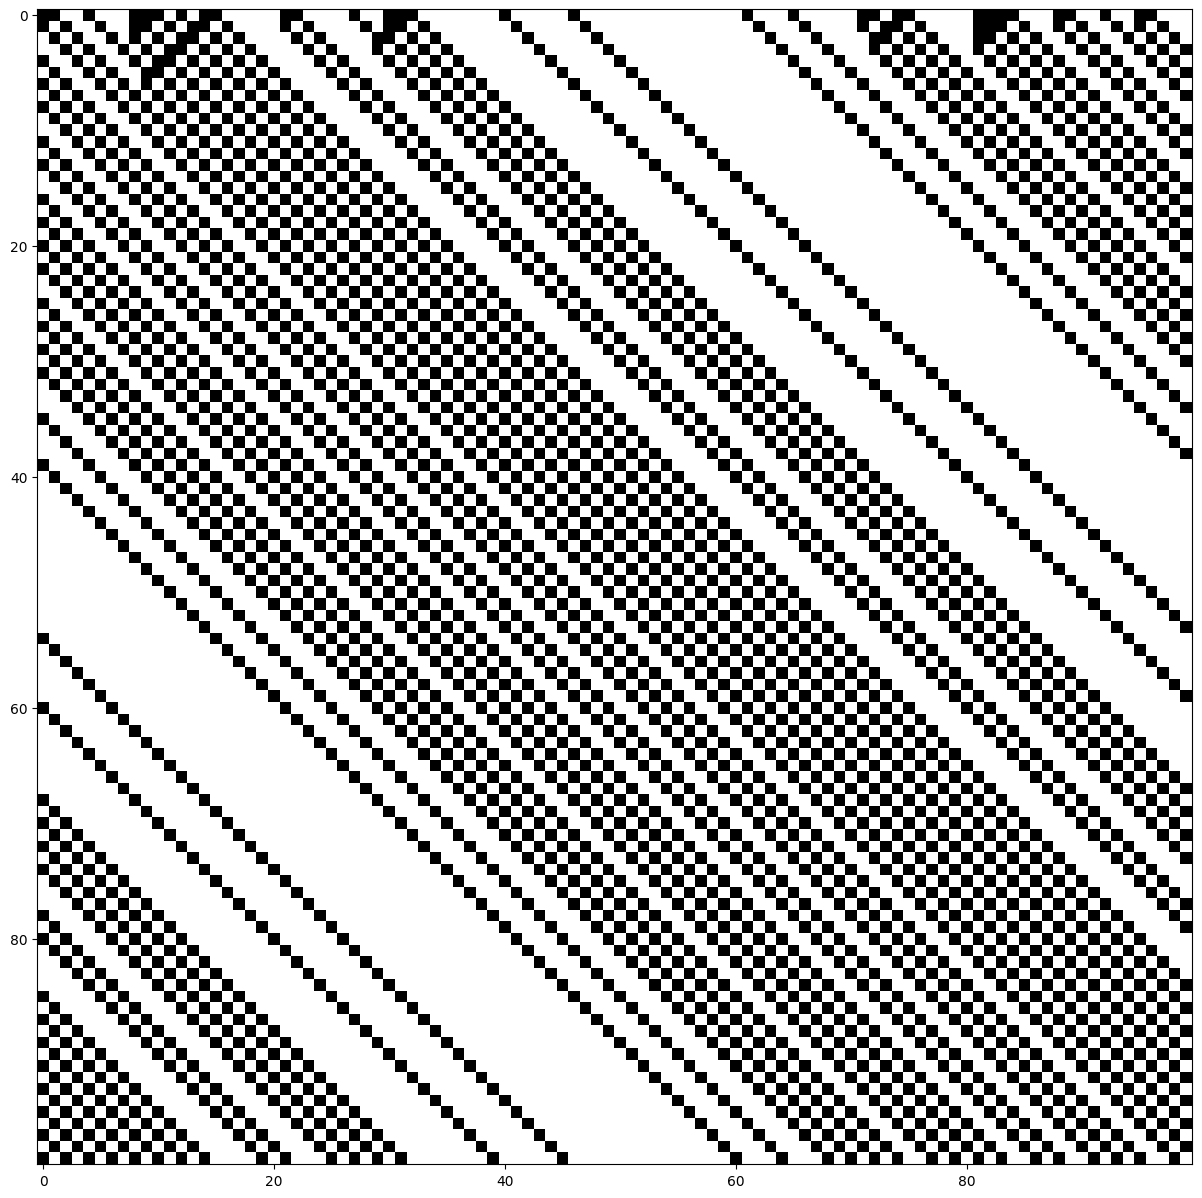

In [97]:
fig, ax = plt.subplots(figsize=(15,15))

ax = ax.imshow(first_grid, cmap="Greys")

plt.show()

Automat z prawdopodobieństwem 0.5 zawsze dązy do pełnej szachownicy. 

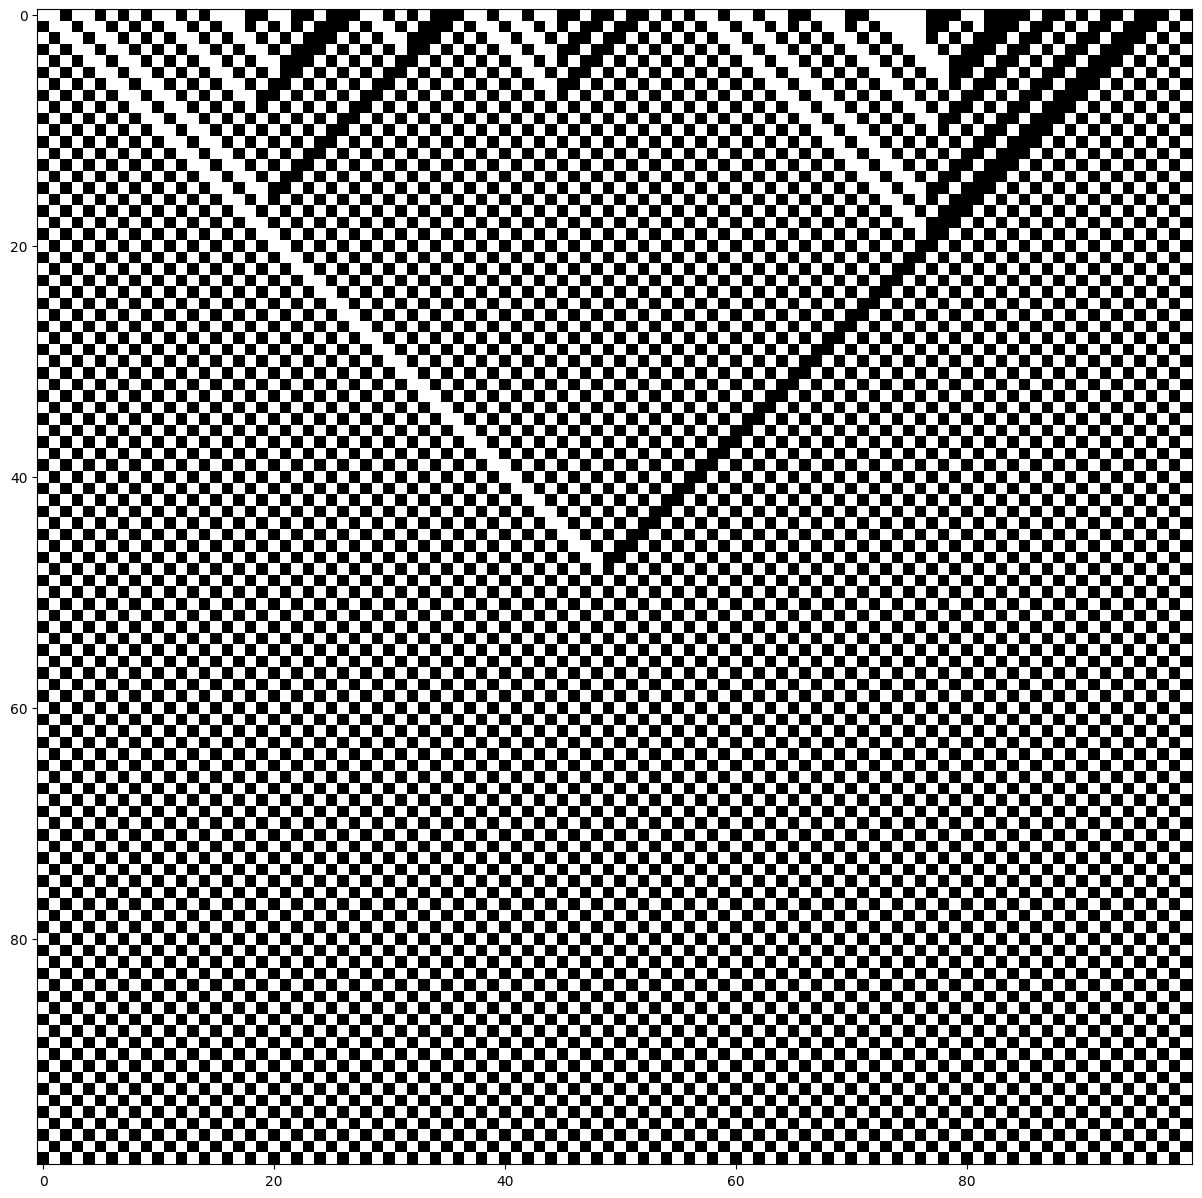

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
ax = ax.imshow(second_grid, cmap="Greys")
plt.show()

Trzeci automat z prawdopodobieństwem 0.6 dla czarnych, przewaga tego koloru.

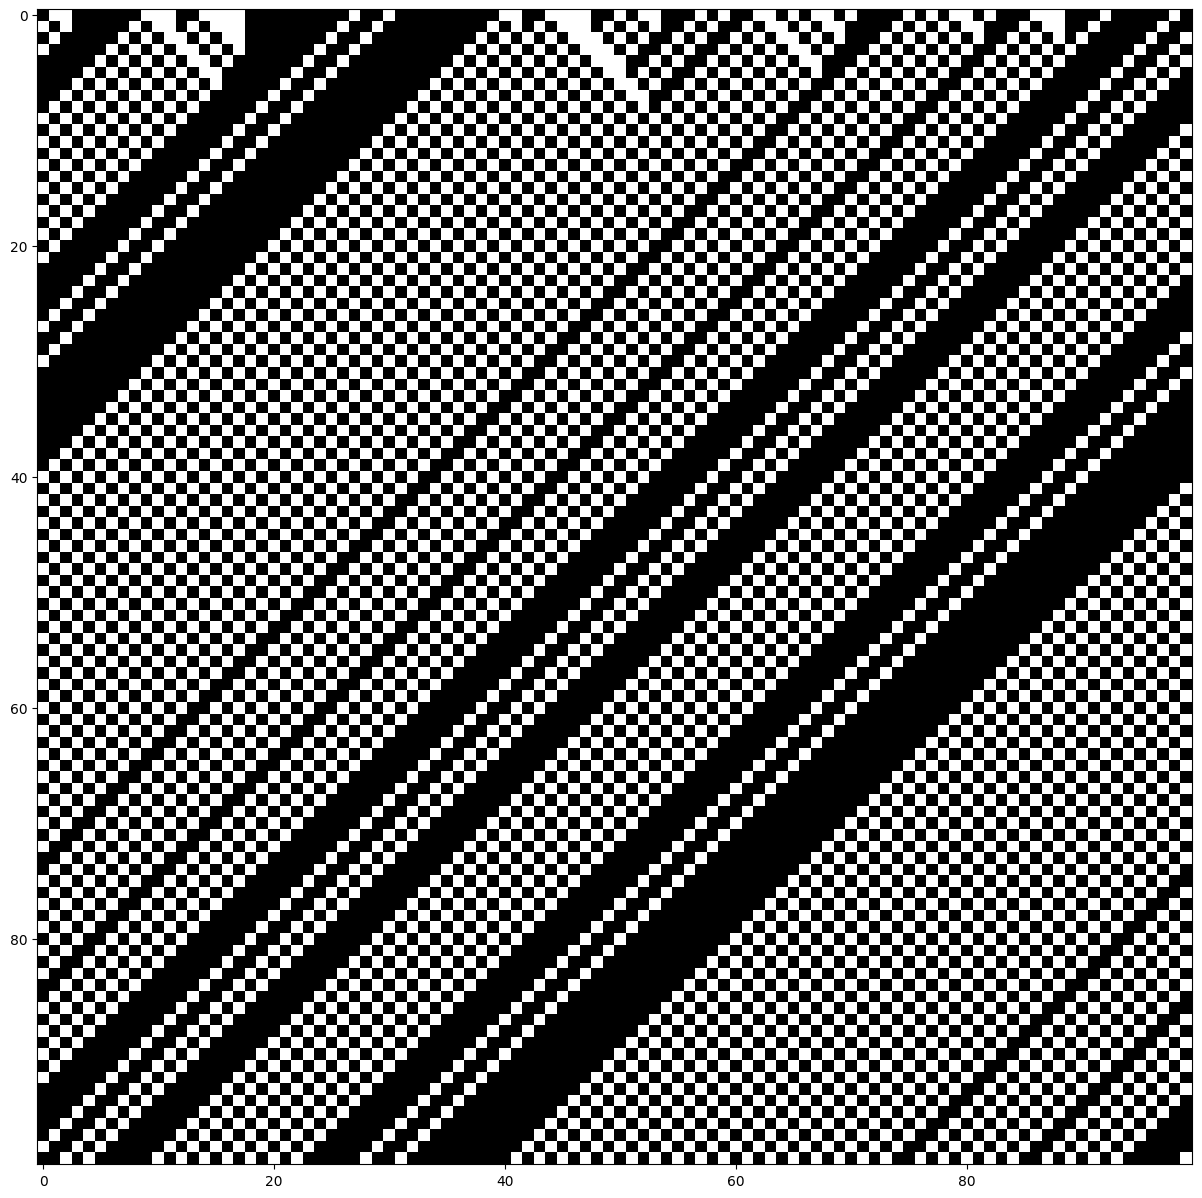

In [99]:
fig, ax = plt.subplots(figsize=(15,15))
ax = ax.imshow(third_grid, cmap="Greys")
plt.show()

## Zadanie 2 Probabilistyczny automat komórkowy (model ruchu ulicznegoNagela-Schreckenberga) 

d_i mozemy dla latwosci przyjac wartosc 1, jako zawsze dostep jednej komórki między samochodzikami